100%|██████████| 3203/3203 [00:03<00:00, 878.73it/s] 


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 256)     7168      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 128)     295040    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 64)        36928     
                                                             

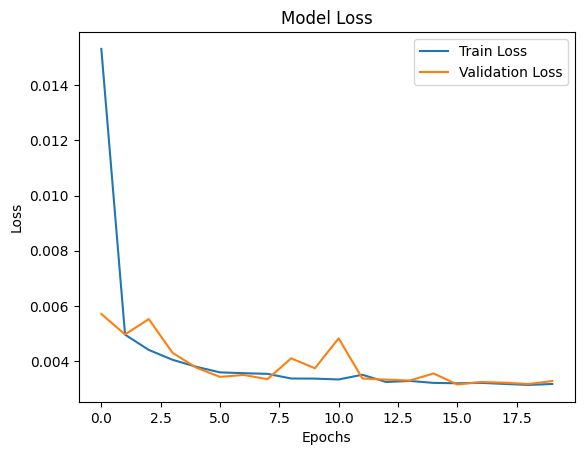

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras import Model, Input
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import glob
from tqdm import tqdm

import glob
from tqdm import tqdm
import warnings;
warnings.filterwarnings('ignore')

#GPU 
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  


image_files = glob.glob("./Dataset/face_mini/**/*.jpg",recursive=True)  
imgs = []


for fname in tqdm(image_files):
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    img = cv2.resize(img, (100, 100))  
    img = np.array(img)
    imgs.append(img)



imgs = np.array(imgs) / 255.0


random_state = 42 
train_x, test_x = train_test_split(imgs, random_state=random_state, test_size=0.3)

train_x, val_x = train_test_split(train_x, random_state=random_state, test_size=0.2)


noise_mean = 0
noise_std = 0.5 
noise_factor = 0.6

train_x_noise = train_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=train_x.shape))
val_x_noise = val_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=val_x.shape))
test_x_noise = test_x + (noise_factor * np.random.normal(loc=noise_mean, scale=noise_std, size=test_x.shape))

Input_img = Input(shape=(100, 100, 3))

x1 = Conv2D(256, (3, 3), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (3, 3), activation='relu', padding='same')(x1)
x3 = MaxPooling2D((2, 2), strides=(2, 2))(x2)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x3)
x4 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x5 = UpSampling2D((2, 2))(x4)
x6 = Conv2D(128, (3, 3), activation='relu', padding='same')(x5)
x7 = Conv2D(256, (3, 3), activation='relu', padding='same')(x6)
decoded_img = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x7)

autoencoder = Model(Input_img, decoded_img)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.summary()

callback = EarlyStopping(monitor= 'loss', patience=3)
history = autoencoder.fit(train_x_noise, train_x,
    epochs=20,
    batch_size=16,
    shuffle=True,
    validation_data=(val_x_noise, val_x),
    callbacks=[callback],
    verbose=1)

# Plot the training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


predictions_test = autoencoder.predict(test_x_noise)
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

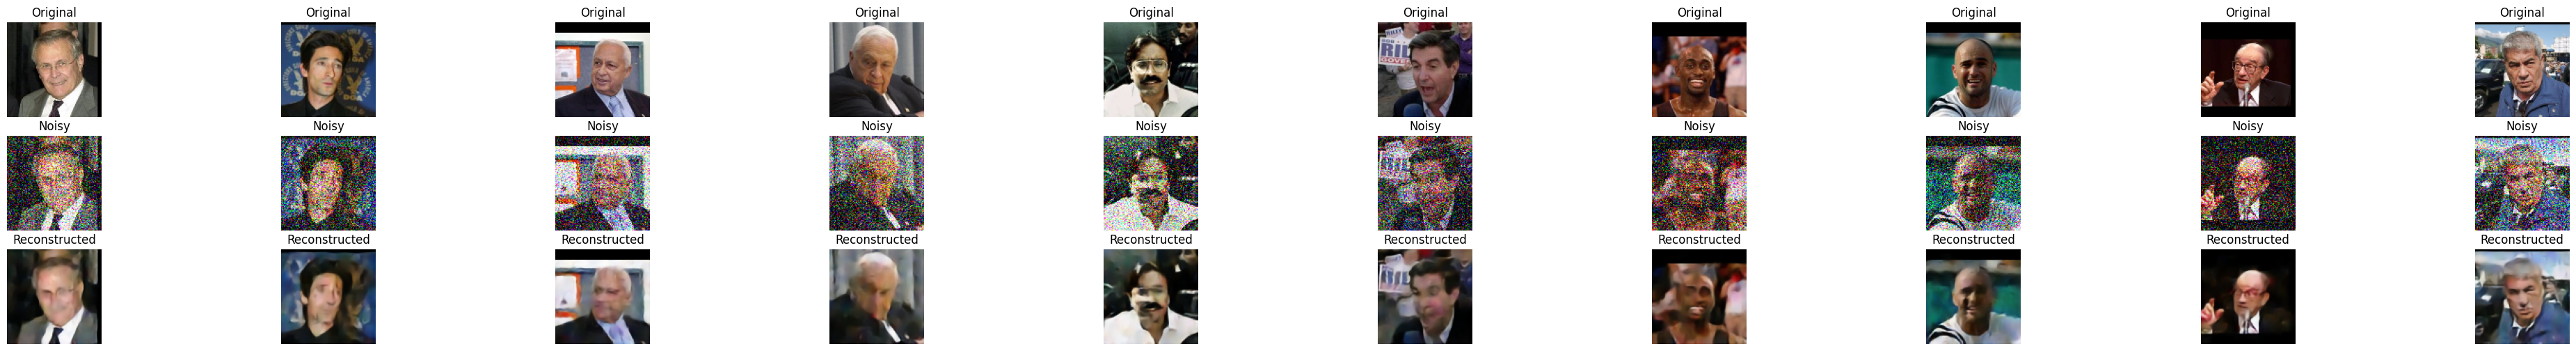

In [11]:
n = 10
plt.figure(figsize=(50, 6))

for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_x[i])
    plt.title("Original")
    plt.axis('off')

    # Display noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(test_x_noise[i])
    plt.title("Noisy")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(predictions_test[i])
    plt.title("Reconstructed")
    plt.axis('off')
    
plt.show()